In [1]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [2]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Dummy variable for Nan

In [3]:
# cabin_na = test_data['Cabin'].isna()
# dataset = [test_data['Cabin'].fillna(test_data['Cabin'].mean()), cabin_na]

In [4]:
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

# Name is bas feature

In [5]:
names_set_1 = set(train_data['Name'])

train_data.shape, len(names_set_1)

((8693, 14), 8474)

In [6]:
names_set_2 = set(test_data['Name'])
test_data.shape, len(names_set_2)

((4277, 13), 4177)

In [7]:
len(names_set_1.intersection(names_set_2))

21

# Other features

In [8]:
train_data.columns[1:-2]

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

# Numerical

In [9]:
# Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

In [10]:
len(set(train_data['Age'])), len(set(test_data['Age']))

(259, 170)

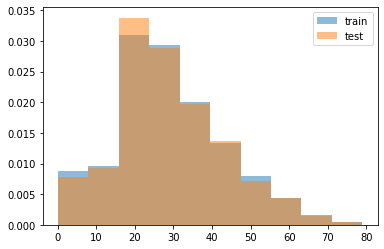

In [11]:
from matplotlib import pyplot as plt

plt.hist(train_data['Age'], density=1, alpha=0.5)
plt.hist(test_data['Age'], density=1, alpha=0.5)
plt.legend(['train', 'test'])

0.6415506729552514
0.6373626373626373


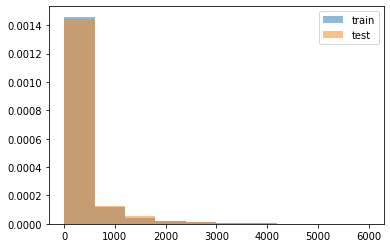

In [12]:
plt.hist(train_data['RoomService'], density=1, alpha=0.5, range=(0, 6000))
plt.hist(test_data['RoomService'], density=1, alpha=0.5, range=(0, 6000))

print((train_data['RoomService'] == 0).mean())
print((test_data['RoomService'] == 0).mean())

plt.legend(['train', 'test'])

0.6276314275854136
0.6289455225625439


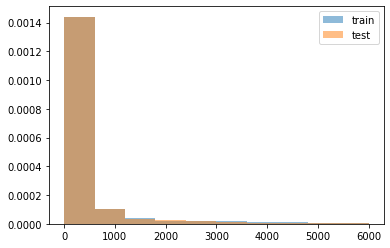

In [13]:
plt.hist(train_data['FoodCourt'], density=1, alpha=0.5, range=(0, 6000))
plt.hist(test_data['FoodCourt'], density=1, alpha=0.5, range=(0, 6000))

print((train_data['FoodCourt'] == 0).mean())
print((test_data['FoodCourt'] == 0).mean())

plt.legend(['train', 'test'])

0.6427010238122628
0.6415711947626841


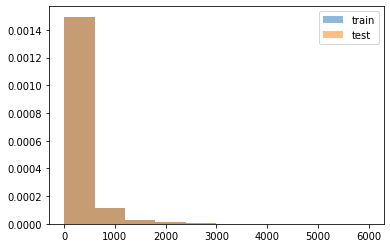

In [14]:
plt.hist(train_data['ShoppingMall'], density=1, alpha=0.5, range=(0, 6000))
plt.hist(test_data['ShoppingMall'], density=1, alpha=0.5, range=(0, 6000))

print((train_data['ShoppingMall'] == 0).mean())
print((test_data['ShoppingMall'] == 0).mean())

plt.legend(['train', 'test'])

0.6124467962728632
0.6104746317512275


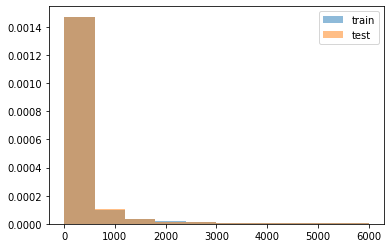

In [15]:
plt.hist(train_data['Spa'], density=1, alpha=0.5, range=(0, 6000))
plt.hist(test_data['Spa'], density=1, alpha=0.5, range=(0, 6000))

print((train_data['Spa'] == 0).mean())
print((test_data['Spa'] == 0).mean())

plt.legend(['train', 'test'])

0.632117795927758
0.6446107084404957


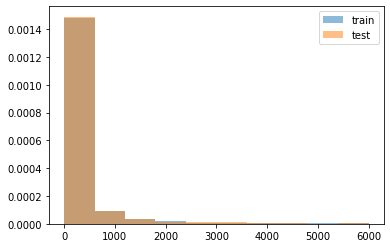

In [16]:
plt.hist(train_data['VRDeck'], density=1, alpha=0.5, range=(0, 6000))
plt.hist(test_data['VRDeck'], density=1, alpha=0.5, range=(0, 6000))

print((train_data['VRDeck'] == 0).mean())
print((test_data['VRDeck'] == 0).mean())

plt.legend(['train', 'test'])

# X numerical

In [17]:
num_cols = ['Age', "VIP", 'RoomService', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

x_num_train_num_na = train_data[num_cols].astype('float32').isna()
x_num_test_num_na = test_data[num_cols].astype('float32').isna()

x_num_train = train_data[num_cols].astype('float32').fillna(-1)
x_num_test = test_data[num_cols].astype('float32').fillna(-1)

In [18]:
x_num_train

,Age,VIP,RoomService,CryoSleep,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,0.0,109.0,0.0,9.0,25.0,549.0,44.0
2,58.0,1.0,43.0,0.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,0.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,0.0,303.0,0.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...
8688,41.0,1.0,0.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,0.0,0.0,1049.0,0.0,353.0,3235.0


In [19]:
# Dummy for numerical
# Я цце не використовую, бо nan тут немає
np.concatenate([x_num_train.fillna(0), x_num_train.isna()], axis=1)

NameError: name 'np' is not defined

# Bool

In [ ]:
train_data['CryoSleep'].mean(), train_data['VIP'].mean()

# Categorical features (factors)

In [20]:
import numpy as np
cat_columns = ['HomePlanet', 'Destination']

def ohe(x, w_i_map):
    encoding = np.zeros((len(x), len(words)))
    for k, w in enumerate(x):
        encoding[k, w_i_map[w]] += 1
    return encoding

In [21]:

x_train_cat = []
x_test_cat = []


for col in cat_columns:
    print(col)
    print('test-train difference', len(set(test_data[col]) - set(train_data[col])))
    print('train, test unique', len(set(test_data[col])), len(set(train_data[col])))
    
    words = set(train_data[col]).union(set(test_data[col]))

#     print(words)
    i_w_map = dict(enumerate(words))
    w_i_map = {v: k for k, v in i_w_map.items()}
#     print(i_w_map, w_i_map)

    col_f_train = ohe(train_data[col], w_i_map)
    col_f_test = ohe(test_data[col], w_i_map)
    print()
    
    x_train_cat.append(col_f_train)
    x_test_cat.append(col_f_test)

x_train_cat = np.concatenate(x_train_cat, axis=1)
x_test_cat = np.concatenate(x_test_cat, axis=1)

    
    # col_encoding_train = np.zeros((len(train_data), len(words)))
    # for w in 

HomePlanet
test-train difference 0
train, test unique 4 4

Destination
test-train difference 0
train, test unique 4 4



In [22]:
x_train_cat.shape

(8693, 8)

In [23]:
x_train_cat.shape, x_test_cat.shape

((8693, 8), (4277, 8))

# Text

In [24]:
a = set([len(i) for i in train_data['Cabin'].dropna().apply(lambda x: x.split('/'))])
a

{3}

In [29]:
sents_train = train_data['Cabin'].apply(lambda x: x.split('/') if isinstance(x, str) else '0/0/0')
sents_test = test_data['Cabin'].apply(lambda x: x.split('/') if isinstance(x, str) else '0/0/0')

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
sents_train.head(4)

0    [B, 0, P]
1    [F, 0, S]
2    [A, 0, S]
3    [A, 0, S]
Name: Cabin, dtype: object

In [32]:
train_data['Cabin'][train_data['Cabin'].isna()] = '0/0/0'
test_data['Cabin'][test_data['Cabin'].isna()] = '0/0/0'

C:\Users\Wailt\AppData\Local\Temp\ipykernel_16228\691969671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Cabin'][train_data['Cabin'].isna()] = '0/0/0'
C:\Users\Wailt\AppData\Local\Temp\ipykernel_16228\691969671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Cabin'][test_data['Cabin'].isna()] = '0/0/0'


In [33]:
sents = train_data['Cabin'].tolist() + test_data['Cabin'].tolist()
counter = CountVectorizer(tokenizer=lambda x: x.split('/')).fit(sents)
counter.transform(['Hello world']).toarray()

C:\Users\Wailt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
len(counter.vocabulary_)

1904

In [35]:
train_text_bow = counter.transform(train_data['Cabin'].tolist()).toarray()
test_text_bow = counter.transform(test_data['Cabin'].tolist()).toarray()

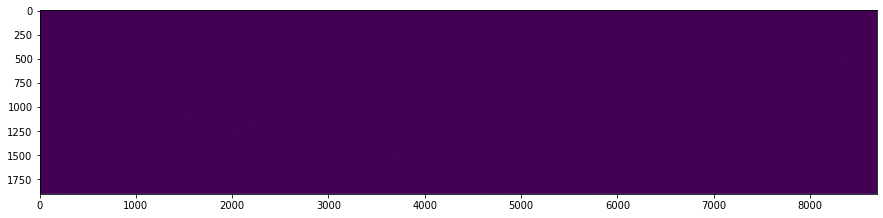

In [36]:
plt.figure(figsize=(15, 7))
plt.imshow(train_text_bow.T)

# Hashig trick

In [37]:
from sklearn.feature_extraction import FeatureHasher

hash_tr = []
hash_te = []

nan = '0/0/0'

for col in ['Cabin']:
    print(col)
    all_cat = train_data[col].fillna(nan).tolist() + test_data[col].fillna(nan).tolist()

    tr_cat_ = [{w: 1 for w in i.split('/')} for i in train_data[col].fillna(nan)]
    te_cat_ = [{w: 1 for w in i.split('/')} for i in test_data[col].fillna(nan)]

    fh = FeatureHasher(n_features=10).fit(tr_cat_ + te_cat_)

    hash_tr = (fh.transform(tr_cat_).toarray())
    hash_te = (fh.transform(te_cat_).toarray())

Cabin


In [38]:
hash_tr, hash_te

(array([[ 0., -1., -1., ...,  0.,  0., -1.],
        [ 0.,  0.,  0., ...,  0., -2., -1.],
        [ 0.,  0.,  1., ...,  0., -1., -1.],
        ...,
        [ 0.,  0., -1., ...,  0., -1.,  1.],
        [-1.,  0.,  0., ...,  1., -1.,  0.],
        [-1.,  0.,  0., ...,  1., -1.,  0.]]),
 array([[ 1.,  0.,  0., ...,  0., -1.,  1.],
        [ 0.,  0., -1., ...,  0., -2.,  0.],
        [ 0., -1.,  0., ...,  0., -1., -1.],
        ...,
        [ 0., -1.,  0., ...,  0.,  0.,  0.],
        [ 0., -1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0., -2.,  1.]]))

# train_data NAN

In [39]:
cabin_na = test_data['Cabin'].isna()
cabin_na.sum()

0

# all features

In [40]:
x_num_train.values.sum()

12772586.0

In [41]:
# x_train = np.concatenate([x_num_train, x_num_train_num_na, x_train_cat, train_text_bow], axis=1)
# x_test = np.concatenate([x_num_test, x_num_test_num_na, x_test_cat, test_text_bow], axis=1)

x_train = np.concatenate([x_num_train, x_num_train_num_na, x_train_cat, hash_tr], axis=1)
x_test = np.concatenate([x_num_test, x_num_test_num_na, x_test_cat, hash_te], axis=1)

In [42]:
y_train = train_data['Transported']

In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [154]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

metrics_model = []
all_models_gb = []
for model_name, model in [#('logistic(C=1)', LogisticRegression()), 
                         #('logistic(C=2)', LogisticRegression(C=2)),
                         ('gb', GradientBoostingClassifier(subsample=0.5, max_features=0.25, n_estimators=150))]:
    metrics = []
    for i in range(5):
        x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, shuffle=1, test_size=0.3)
        
        model.fit(x_tr, y_tr)
        
        y_tr_pred = model.predict(x_tr)
        metric = {}
        metric['train_f1_train'] = f1_score(y_tr, y_tr_pred)
        metric['train_precision'] = precision_score(y_tr, y_tr_pred)
        metric['train_recall'] = recall_score(y_tr, y_tr_pred)
        
        y_val_pred = model.predict(x_val)
        metric['test_f1_train'] = f1_score(y_val, y_val_pred)
        metric['test_precision'] = precision_score(y_val, y_val_pred)
        metric['test_recall'] = recall_score(y_val, y_val_pred)
        
        metrics.append(metric)
        
        all_models_gb.append(model)
    
    model_avg = pd.DataFrame(metrics).mean()
    model_avg['model'] = model_name
    metrics_model.append(model_avg)

In [111]:
pd.DataFrame(metrics_model) # wo texts

,train_f1_train,train_precision,train_recall,test_f1_train,test_precision,test_recall,model
0,0.825265,0.801538,0.850453,0.801383,0.782198,0.821765,gb


In [48]:
y_probas = []
for model in all_models:
    y_probas.append(model.predict_proba(x_test))

In [49]:
y_te = np.mean(y_probas, axis=0).argmax(axis=1)
submit = pd.DataFrame(np.array([test_data['PassengerId'], y_te == 1]).T, columns=['PassengerId', 'Transported'])
submit.to_csv('submit_gb.csv', index=False)

# Neural network

In [91]:
from tensorflow import keras
from tensorflow.keras import layers

In [92]:
def build_nn():
    model = keras.Sequential()

    model.add(layer=layers.Dense(128, activation='selu'))
    model.add(layer=layers.Dropout(0.1))

    model.add(layer=layers.Dense(128, activation='selu'))
    model.add(layer=layers.Dropout(0.1))

    model.add(layer=layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['binary_crossentropy'], loss='binary_crossentropy')
    return model

In [93]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [94]:
all_models = []
metrics = []
for i in range(5):
    x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, shuffle=1, test_size=0.3)
    model = build_nn()
    
    model.fit(x_tr, y_tr, batch_size=128, validation_data=(x_val, y_val), epochs=200, callbacks=callback)

    y_tr_pred = model.predict(x_tr).T[0] > 0.5
    metric = {}
    metric['train_f1_train'] = f1_score(y_tr, y_tr_pred)
    metric['train_precision'] = precision_score(y_tr, y_tr_pred)
    metric['train_recall'] = recall_score(y_tr, y_tr_pred)

    y_val_pred = model.predict(x_val).T[0] > 0.5
    metric['test_f1_train'] = f1_score(y_val, y_val_pred)
    metric['test_precision'] = precision_score(y_val, y_val_pred)
    metric['test_recall'] = recall_score(y_val, y_val_pred)

    metrics.append(metric)

    all_models.append(model)

Epoch 1/200
48/48 [==============================] - 1s 15ms/step - loss: 23.1480 - binary_crossentropy: 23.1480 - val_loss: 10.1084 - val_binary_crossentropy: 10.1084
Epoch 2/200
48/48 [==============================] - 0s 10ms/step - loss: 11.7116 - binary_crossentropy: 11.7116 - val_loss: 5.9206 - val_binary_crossentropy: 5.9206
Epoch 3/200
48/48 [==============================] - 0s 9ms/step - loss: 10.7405 - binary_crossentropy: 10.7405 - val_loss: 6.3913 - val_binary_crossentropy: 6.3913
Epoch 4/200
48/48 [==============================] - 0s 9ms/step - loss: 10.3513 - binary_crossentropy: 10.3513 - val_loss: 5.7526 - val_binary_crossentropy: 5.7526
Epoch 5/200
48/48 [==============================] - 0s 9ms/step - loss: 9.5344 - binary_crossentropy: 9.5344 - val_loss: 5.7272 - val_binary_crossentropy: 5.7272
Epoch 6/200
48/48 [==============================] - 0s 9ms/step - loss: 8.4787 - binary_crossentropy: 8.4787 - val_loss: 5.5021 - val_binary_crossentropy: 5.5021
Epoch 7/20

Epoch 51/200
48/48 [==============================] - 1s 11ms/step - loss: 2.3185 - binary_crossentropy: 2.3185 - val_loss: 1.4498 - val_binary_crossentropy: 1.4498
Epoch 52/200
48/48 [==============================] - 0s 10ms/step - loss: 2.4023 - binary_crossentropy: 2.4023 - val_loss: 1.3389 - val_binary_crossentropy: 1.3389
Epoch 53/200
48/48 [==============================] - 0s 9ms/step - loss: 2.4186 - binary_crossentropy: 2.4186 - val_loss: 1.3432 - val_binary_crossentropy: 1.3432
Epoch 54/200
48/48 [==============================] - 0s 10ms/step - loss: 2.2851 - binary_crossentropy: 2.2851 - val_loss: 1.3984 - val_binary_crossentropy: 1.3984
Epoch 55/200
48/48 [==============================] - 0s 10ms/step - loss: 2.1357 - binary_crossentropy: 2.1357 - val_loss: 1.3179 - val_binary_crossentropy: 1.3179
Epoch 56/200
48/48 [==============================] - 0s 10ms/step - loss: 2.2340 - binary_crossentropy: 2.2340 - val_loss: 1.2545 - val_binary_crossentropy: 1.2545
Epoch 57/20

Epoch 101/200
48/48 [==============================] - 0s 9ms/step - loss: 0.7307 - binary_crossentropy: 0.7307 - val_loss: 0.4741 - val_binary_crossentropy: 0.4741
Epoch 102/200
48/48 [==============================] - 0s 10ms/step - loss: 0.7086 - binary_crossentropy: 0.7086 - val_loss: 0.4734 - val_binary_crossentropy: 0.4734
Epoch 103/200
48/48 [==============================] - 1s 11ms/step - loss: 0.6928 - binary_crossentropy: 0.6928 - val_loss: 0.4689 - val_binary_crossentropy: 0.4689
Epoch 104/200
48/48 [==============================] - 0s 9ms/step - loss: 0.7121 - binary_crossentropy: 0.7121 - val_loss: 0.4651 - val_binary_crossentropy: 0.4651
Epoch 105/200
48/48 [==============================] - 1s 11ms/step - loss: 0.7221 - binary_crossentropy: 0.7221 - val_loss: 0.4646 - val_binary_crossentropy: 0.4646
Epoch 106/200
48/48 [==============================] - 0s 9ms/step - loss: 0.6669 - binary_crossentropy: 0.6669 - val_loss: 0.4589 - val_binary_crossentropy: 0.4589
Epoch 1

48/48 [==============================] - 1s 11ms/step - loss: 0.4826 - binary_crossentropy: 0.4826 - val_loss: 0.4286 - val_binary_crossentropy: 0.4286
Epoch 151/200
48/48 [==============================] - 1s 10ms/step - loss: 0.4679 - binary_crossentropy: 0.4679 - val_loss: 0.4292 - val_binary_crossentropy: 0.4292
Epoch 152/200
48/48 [==============================] - 1s 11ms/step - loss: 0.4768 - binary_crossentropy: 0.4768 - val_loss: 0.4289 - val_binary_crossentropy: 0.4289
Epoch 153/200
48/48 [==============================] - 0s 10ms/step - loss: 0.4755 - binary_crossentropy: 0.4755 - val_loss: 0.4292 - val_binary_crossentropy: 0.4292
Epoch 154/200
48/48 [==============================] - 1s 11ms/step - loss: 0.4694 - binary_crossentropy: 0.4694 - val_loss: 0.4302 - val_binary_crossentropy: 0.4302
Epoch 155/200
48/48 [==============================] - 0s 10ms/step - loss: 0.4718 - binary_crossentropy: 0.4718 - val_loss: 0.4344 - val_binary_crossentropy: 0.4344
Epoch 156/200
48/4

Epoch 43/200
48/48 [==============================] - 0s 9ms/step - loss: 2.5714 - binary_crossentropy: 2.5714 - val_loss: 1.6732 - val_binary_crossentropy: 1.6732
Epoch 44/200
48/48 [==============================] - 0s 10ms/step - loss: 2.5594 - binary_crossentropy: 2.5594 - val_loss: 1.5944 - val_binary_crossentropy: 1.5944
Epoch 45/200
48/48 [==============================] - 0s 10ms/step - loss: 2.4359 - binary_crossentropy: 2.4359 - val_loss: 1.5642 - val_binary_crossentropy: 1.5642
Epoch 46/200
48/48 [==============================] - 0s 10ms/step - loss: 2.4374 - binary_crossentropy: 2.4374 - val_loss: 1.5436 - val_binary_crossentropy: 1.5436
Epoch 47/200
48/48 [==============================] - 0s 10ms/step - loss: 2.4102 - binary_crossentropy: 2.4102 - val_loss: 1.5538 - val_binary_crossentropy: 1.5538
Epoch 48/200
48/48 [==============================] - 0s 10ms/step - loss: 2.5811 - binary_crossentropy: 2.5811 - val_loss: 1.5810 - val_binary_crossentropy: 1.5810
Epoch 49/20

Epoch 93/200
48/48 [==============================] - 0s 9ms/step - loss: 0.9316 - binary_crossentropy: 0.9316 - val_loss: 0.6253 - val_binary_crossentropy: 0.6253
Epoch 94/200
48/48 [==============================] - 0s 9ms/step - loss: 0.9421 - binary_crossentropy: 0.9421 - val_loss: 0.5958 - val_binary_crossentropy: 0.5958
Epoch 95/200
48/48 [==============================] - 0s 9ms/step - loss: 0.9207 - binary_crossentropy: 0.9207 - val_loss: 0.5811 - val_binary_crossentropy: 0.5811
Epoch 96/200
48/48 [==============================] - 0s 9ms/step - loss: 0.8510 - binary_crossentropy: 0.8510 - val_loss: 0.5748 - val_binary_crossentropy: 0.5748
Epoch 97/200
48/48 [==============================] - 0s 10ms/step - loss: 0.8916 - binary_crossentropy: 0.8916 - val_loss: 0.5654 - val_binary_crossentropy: 0.5654
Epoch 98/200
48/48 [==============================] - 0s 10ms/step - loss: 0.8318 - binary_crossentropy: 0.8318 - val_loss: 0.5604 - val_binary_crossentropy: 0.5604
Epoch 99/200
4

48/48 [==============================] - 0s 10ms/step - loss: 0.4839 - binary_crossentropy: 0.4839 - val_loss: 0.4389 - val_binary_crossentropy: 0.4389
Epoch 143/200
48/48 [==============================] - 0s 10ms/step - loss: 0.4996 - binary_crossentropy: 0.4996 - val_loss: 0.4363 - val_binary_crossentropy: 0.4363
Epoch 144/200
48/48 [==============================] - 0s 10ms/step - loss: 0.4673 - binary_crossentropy: 0.4673 - val_loss: 0.4383 - val_binary_crossentropy: 0.4383
Epoch 145/200
48/48 [==============================] - 1s 11ms/step - loss: 0.4685 - binary_crossentropy: 0.4685 - val_loss: 0.4337 - val_binary_crossentropy: 0.4337
Epoch 146/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4899 - binary_crossentropy: 0.4899 - val_loss: 0.4334 - val_binary_crossentropy: 0.4334
Epoch 147/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4715 - binary_crossentropy: 0.4715 - val_loss: 0.4385 - val_binary_crossentropy: 0.4385
Epoch 148/200
48/48 

Epoch 25/200
48/48 [==============================] - 1s 11ms/step - loss: 4.6080 - binary_crossentropy: 4.6080 - val_loss: 2.7892 - val_binary_crossentropy: 2.7892
Epoch 26/200
48/48 [==============================] - 1s 11ms/step - loss: 4.7104 - binary_crossentropy: 4.7104 - val_loss: 2.7263 - val_binary_crossentropy: 2.7263
Epoch 27/200
48/48 [==============================] - 0s 10ms/step - loss: 4.1335 - binary_crossentropy: 4.1335 - val_loss: 2.7951 - val_binary_crossentropy: 2.7951
Epoch 28/200
48/48 [==============================] - 0s 9ms/step - loss: 4.3494 - binary_crossentropy: 4.3494 - val_loss: 2.5572 - val_binary_crossentropy: 2.5572
Epoch 29/200
48/48 [==============================] - 0s 9ms/step - loss: 4.3592 - binary_crossentropy: 4.3592 - val_loss: 2.3966 - val_binary_crossentropy: 2.3966
Epoch 30/200
48/48 [==============================] - 0s 10ms/step - loss: 4.1077 - binary_crossentropy: 4.1077 - val_loss: 2.4151 - val_binary_crossentropy: 2.4151
Epoch 31/200

Epoch 75/200
48/48 [==============================] - 0s 10ms/step - loss: 1.3186 - binary_crossentropy: 1.3186 - val_loss: 0.7521 - val_binary_crossentropy: 0.7521
Epoch 76/200
48/48 [==============================] - 0s 10ms/step - loss: 1.2763 - binary_crossentropy: 1.2763 - val_loss: 0.7644 - val_binary_crossentropy: 0.7644
Epoch 77/200
48/48 [==============================] - 0s 10ms/step - loss: 1.2488 - binary_crossentropy: 1.2488 - val_loss: 0.7478 - val_binary_crossentropy: 0.7478
Epoch 78/200
48/48 [==============================] - 1s 12ms/step - loss: 1.1593 - binary_crossentropy: 1.1593 - val_loss: 0.7202 - val_binary_crossentropy: 0.7202
Epoch 79/200
48/48 [==============================] - 1s 10ms/step - loss: 1.1578 - binary_crossentropy: 1.1578 - val_loss: 0.7092 - val_binary_crossentropy: 0.7092
Epoch 80/200
48/48 [==============================] - 0s 9ms/step - loss: 1.1655 - binary_crossentropy: 1.1655 - val_loss: 0.6868 - val_binary_crossentropy: 0.6868
Epoch 81/20

48/48 [==============================] - 0s 10ms/step - loss: 0.5286 - binary_crossentropy: 0.5286 - val_loss: 0.4401 - val_binary_crossentropy: 0.4401
Epoch 125/200
48/48 [==============================] - 1s 11ms/step - loss: 0.5107 - binary_crossentropy: 0.5107 - val_loss: 0.4400 - val_binary_crossentropy: 0.4400
Epoch 126/200
48/48 [==============================] - 0s 9ms/step - loss: 0.5061 - binary_crossentropy: 0.5061 - val_loss: 0.4396 - val_binary_crossentropy: 0.4396
Epoch 127/200
48/48 [==============================] - 1s 11ms/step - loss: 0.5054 - binary_crossentropy: 0.5054 - val_loss: 0.4405 - val_binary_crossentropy: 0.4405
Epoch 128/200
48/48 [==============================] - 0s 10ms/step - loss: 0.5109 - binary_crossentropy: 0.5109 - val_loss: 0.4392 - val_binary_crossentropy: 0.4392
Epoch 129/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4997 - binary_crossentropy: 0.4997 - val_loss: 0.4370 - val_binary_crossentropy: 0.4370
Epoch 130/200
48/48 

Epoch 18/200
48/48 [==============================] - 0s 9ms/step - loss: 5.6884 - binary_crossentropy: 5.6884 - val_loss: 3.5302 - val_binary_crossentropy: 3.5302
Epoch 19/200
48/48 [==============================] - 0s 10ms/step - loss: 5.2752 - binary_crossentropy: 5.2752 - val_loss: 3.2303 - val_binary_crossentropy: 3.2303
Epoch 20/200
48/48 [==============================] - 0s 9ms/step - loss: 5.0911 - binary_crossentropy: 5.0911 - val_loss: 3.1566 - val_binary_crossentropy: 3.1566
Epoch 21/200
48/48 [==============================] - 0s 10ms/step - loss: 4.8598 - binary_crossentropy: 4.8598 - val_loss: 3.0325 - val_binary_crossentropy: 3.0325
Epoch 22/200
48/48 [==============================] - 0s 9ms/step - loss: 4.6534 - binary_crossentropy: 4.6534 - val_loss: 3.3189 - val_binary_crossentropy: 3.3189
Epoch 23/200
48/48 [==============================] - 0s 9ms/step - loss: 4.7910 - binary_crossentropy: 4.7910 - val_loss: 2.6673 - val_binary_crossentropy: 2.6673
Epoch 24/200
4

Epoch 68/200
48/48 [==============================] - 0s 9ms/step - loss: 1.5526 - binary_crossentropy: 1.5526 - val_loss: 0.8312 - val_binary_crossentropy: 0.8312
Epoch 69/200
48/48 [==============================] - 1s 10ms/step - loss: 1.5553 - binary_crossentropy: 1.5553 - val_loss: 0.8895 - val_binary_crossentropy: 0.8895
Epoch 70/200
48/48 [==============================] - 0s 10ms/step - loss: 1.6582 - binary_crossentropy: 1.6582 - val_loss: 0.8235 - val_binary_crossentropy: 0.8235
Epoch 71/200
48/48 [==============================] - 1s 11ms/step - loss: 1.4697 - binary_crossentropy: 1.4697 - val_loss: 0.8419 - val_binary_crossentropy: 0.8419
Epoch 72/200
48/48 [==============================] - 0s 8ms/step - loss: 1.5669 - binary_crossentropy: 1.5669 - val_loss: 0.7961 - val_binary_crossentropy: 0.7961
Epoch 73/200
48/48 [==============================] - 0s 10ms/step - loss: 1.4561 - binary_crossentropy: 1.4561 - val_loss: 0.8076 - val_binary_crossentropy: 0.8076
Epoch 74/200

Epoch 118/200
48/48 [==============================] - 0s 10ms/step - loss: 0.6047 - binary_crossentropy: 0.6047 - val_loss: 0.4784 - val_binary_crossentropy: 0.4784
Epoch 119/200
48/48 [==============================] - 1s 11ms/step - loss: 0.6059 - binary_crossentropy: 0.6059 - val_loss: 0.4761 - val_binary_crossentropy: 0.4761
Epoch 120/200
48/48 [==============================] - 1s 11ms/step - loss: 0.5658 - binary_crossentropy: 0.5658 - val_loss: 0.4709 - val_binary_crossentropy: 0.4709
Epoch 121/200
48/48 [==============================] - 0s 10ms/step - loss: 0.5742 - binary_crossentropy: 0.5742 - val_loss: 0.4674 - val_binary_crossentropy: 0.4674
Epoch 122/200
48/48 [==============================] - 1s 11ms/step - loss: 0.5832 - binary_crossentropy: 0.5832 - val_loss: 0.4688 - val_binary_crossentropy: 0.4688
Epoch 123/200
48/48 [==============================] - 1s 11ms/step - loss: 0.5950 - binary_crossentropy: 0.5950 - val_loss: 0.4664 - val_binary_crossentropy: 0.4664
Epoc

48/48 [==============================] - 0s 9ms/step - loss: 0.4579 - binary_crossentropy: 0.4579 - val_loss: 0.4449 - val_binary_crossentropy: 0.4449
Epoch 168/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4631 - binary_crossentropy: 0.4631 - val_loss: 0.4409 - val_binary_crossentropy: 0.4409
Epoch 169/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4540 - binary_crossentropy: 0.4540 - val_loss: 0.4406 - val_binary_crossentropy: 0.4406
Epoch 170/200
48/48 [==============================] - 0s 9ms/step - loss: 0.4601 - binary_crossentropy: 0.4601 - val_loss: 0.4413 - val_binary_crossentropy: 0.4413
Epoch 171/200
48/48 [==============================] - 0s 10ms/step - loss: 0.4556 - binary_crossentropy: 0.4556 - val_loss: 0.4410 - val_binary_crossentropy: 0.4410
Epoch 172/200
48/48 [==============================] - 0s 10ms/step - loss: 0.4585 - binary_crossentropy: 0.4585 - val_loss: 0.4422 - val_binary_crossentropy: 0.4422
Epoch 173/200
48/48 [=

In [96]:
model_avg = pd.DataFrame(metrics).mean()
model_avg

train_f1_train     0.800752
train_precision    0.787742
train_recall       0.815930
test_f1_train      0.799148
test_precision     0.783699
test_recall        0.817822
dtype: float64

In [117]:
y_probas = []
for model in all_models:
    y_probas.append(model.predict(x_test).T[0])
    
for model in all_models_gb:
    y_probas.append(model.predict_proba(x_test).T[1])
    
y_te = np.array(y_probas).mean(axis=0) > 0.5
submit = pd.DataFrame(np.array([test_data['PassengerId'], y_te]).T, columns=['PassengerId', 'Transported'])
submit.to_csv('submit_nn_gb.csv', index=False)

# Noisy student

In [126]:
x_train.shape, y_train.shape

((8693, 34), (8693,))

In [128]:
x_test.shape, #y_test.shape

((4277, 34),)

In [135]:
y_test_preudo = (np.array(y_probas).mean(axis=0) + np.random.normal(0, 0.025, size=len(x_test))) > 0.5

In [138]:
x_all = np.append(x_train, x_test, axis=0)
y_all = np.append(y_train, y_test_preudo)

In [149]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

metrics_model = []
all_models_ps = []
for model_name, model in [
#     ('logistic(C=1)', LogisticRegression()), 
#     ('logistic(C=2)', LogisticRegression(C=2)),
                         ('gb', GradientBoostingClassifier(subsample=0.5, max_features=0.25, n_estimators=150))]:
    metrics = []
    for i in range(10):
        x_tr, x_val, y_tr, y_val = train_test_split(x_all, y_all, shuffle=1, test_size=0.3)
        
        model.fit(x_tr, y_tr)
        
        y_tr_pred = model.predict(x_tr)
        metric = {}
        metric['train_f1_train'] = f1_score(y_tr, y_tr_pred)
        metric['train_precision'] = precision_score(y_tr, y_tr_pred)
        metric['train_recall'] = recall_score(y_tr, y_tr_pred)
        
        y_val_pred = model.predict(x_val)
        metric['test_f1_train'] = f1_score(y_val, y_val_pred)
        metric['test_precision'] = precision_score(y_val, y_val_pred)
        metric['test_recall'] = recall_score(y_val, y_val_pred)
        
        metrics.append(metric)
        
        all_models_ps.append(model)
    
    model_avg = pd.DataFrame(metrics).mean()
    model_avg['model'] = model_name
    metrics_model.append(model_avg)

In [150]:
pd.DataFrame(metrics_model)

,train_f1_train,train_precision,train_recall,test_f1_train,test_precision,test_recall,model
0,0.87557,0.847821,0.905202,0.86391,0.834501,0.89555,gb


In [151]:
y_probas = []
for model in all_models_ps:
    y_probas.append(model.predict_proba(x_test).T[1])

In [152]:
y_te = np.array(y_probas).mean(axis=0) > 0.5
submit = pd.DataFrame(np.array([test_data['PassengerId'], y_te]).T, columns=['PassengerId', 'Transported'])
submit.to_csv('submit_ps.csv', index=False)

In [153]:
submit

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


# 

In [156]:
y_probas = []
for model in all_models:
    y_probas.append(model.predict(x_test).T[0])
    
for model in all_models_gb:
    y_probas.append(model.predict_proba(x_test).T[1])
    
for model in all_models_ps:
    y_probas.append(model.predict_proba(x_test).T[1])

In [157]:
len(y_probas)

20

In [159]:
    y_te = np.array(y_probas).mean(axis=0) > 0.5
submit = pd.DataFrame(np.array([test_data['PassengerId'], y_te]).T, columns=['PassengerId', 'Transported'])
submit.to_csv('submit_all.csv', index=False)